In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import rasterio
import matplotlib.pyplot as plt
from IPython.display import display

In [16]:
train_csv_path = '/datasets/rpartsey/satellite/planet/csv/classification/train.csv'
val_csv_path = '/datasets/rpartsey/satellite/planet/csv/classification/val.csv'

In [17]:
df = pd.read_csv(train_csv_path)

In [18]:
df.head()

,image_path,mask_path,label
0,/datasets/rpartsey/satellite/planet/change_det...,/datasets/rpartsey/satellite/planet/change_det...,1
1,/datasets/rpartsey/satellite/planet/change_det...,/datasets/rpartsey/satellite/planet/change_det...,0
2,/datasets/rpartsey/satellite/planet/change_det...,/datasets/rpartsey/satellite/planet/change_det...,0
3,/datasets/rpartsey/satellite/planet/change_det...,/datasets/rpartsey/satellite/planet/change_det...,1
4,/datasets/rpartsey/satellite/planet/change_det...,/datasets/rpartsey/satellite/planet/change_det...,0


In [13]:
df.iloc[0,0]

'/datasets/rpartsey/satellite/planet/change_detection/ml-proj-2017-su-au-1_2017-sp-1_2017-sp-2_256x256/images/20170330_075416_0e2f_3B_AnalyticMS_6_6_spring.tif'

In [19]:
def read_tif(path, *args, **kwargs):
    """
    Args:
        path (string): Path to the tif file.

    Returns:
        numpy.ndarray: Numpy array of shape (CxHxW)
    """
    with rasterio.open(path) as source:
        bands = source.read()
        return bands
    
    
def visualize(*images, **configs):
    figsize = configs.get('figsize') or (5, 5)
    titles = configs.get('titles') or [None] * len(images)
    plot_params = configs['plot_params']
    
    fig, axes = plt.subplots(1, len(images), figsize=figsize)

    for ax, image, title, params in zip(axes, images, titles, plot_params):
        ax.axis('off')
        ax.set_title(title)
        ax.imshow(image, **params)
    
    plt.show()

Burned area


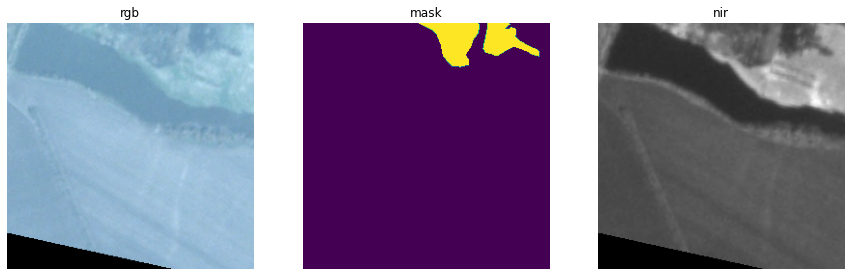

Burned area


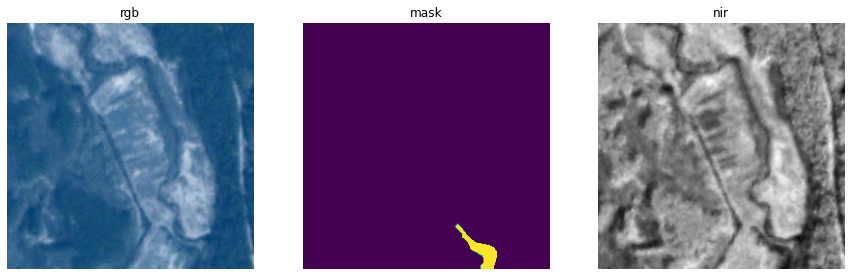

no burned area


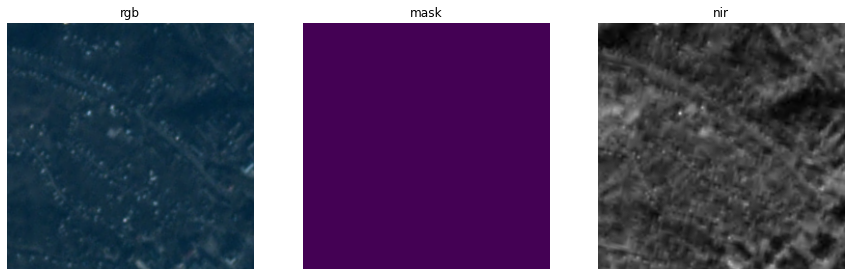

no burned area


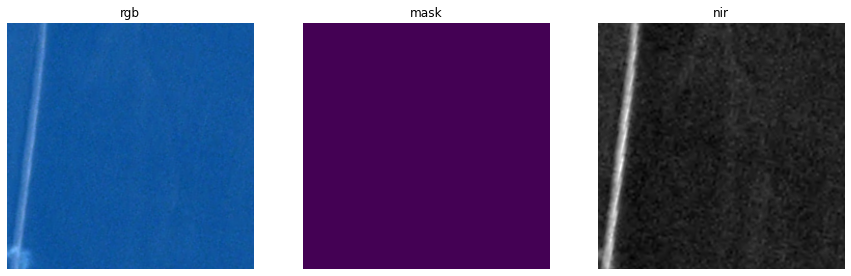

Burned area


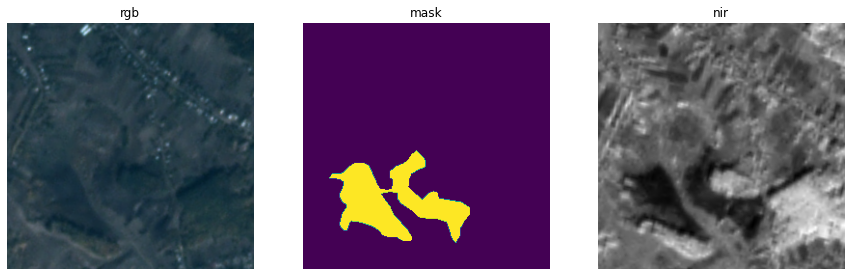

Burned area


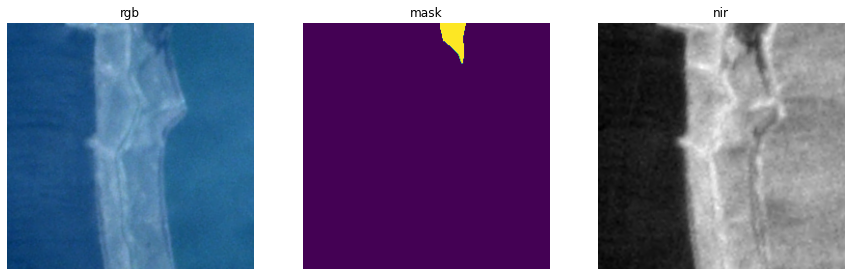

Burned area


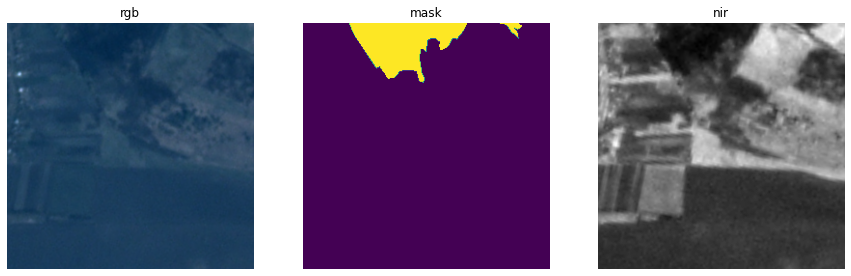

no burned area


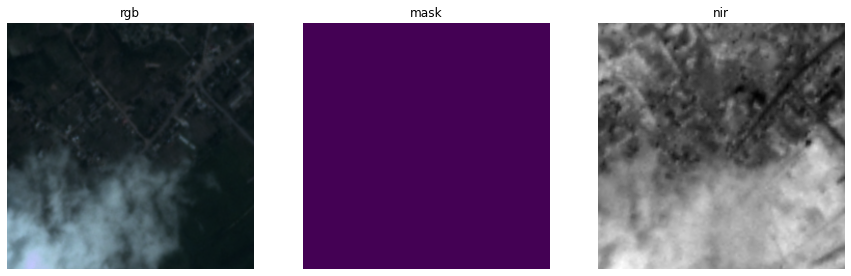

Burned area


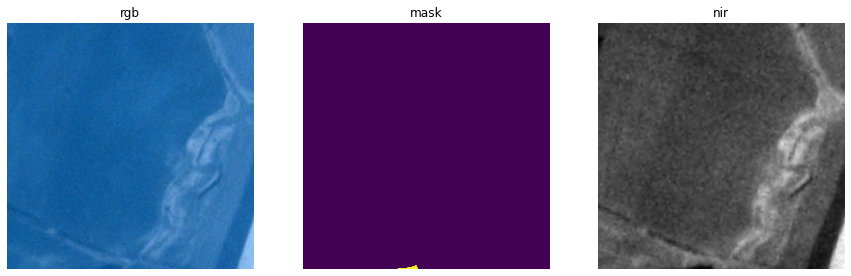

no burned area


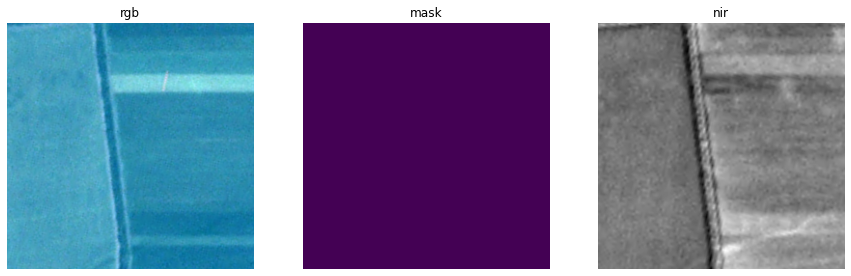

In [47]:
for index, row in df[20:30].iterrows():
    image_path, mask_path, label = row
    
    tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
    b, g, r, nir = tif_image
    mask = tif_mask[0]
    
    rgb = np.array([r, g, b]).transpose((1, 2, 0))
    rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    print('Burned area' if label else 'no burned area')
    visualize(
        *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
        titles=['rgb', 'mask', 'nir'],
        plot_params=[{}, {}, {'cmap': 'gray'}],
        figsize=(15, 5)
    ) 

In [57]:
df_with_labels = df[df.label.astype(bool)].reset_index(drop=True)

In [58]:
areas = []
indices = []

for index, row in df_with_labels.iterrows():
    image_path, mask_path, label = row
    
#     tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
    mask = tif_mask[0]
    num_masked_pixels = mask.sum()
    if num_masked_pixels <= 256:
        areas.append(num_masked_pixels)
        indices.append(index)

In [59]:
len(areas)

99

(array([22., 14., 18., 12., 10.,  7.,  9.,  7.]),
 array([  1.  ,  32.25,  63.5 ,  94.75, 126.  , 157.25, 188.5 , 219.75,
        251.  ]),
 <a list of 8 Patch objects>)

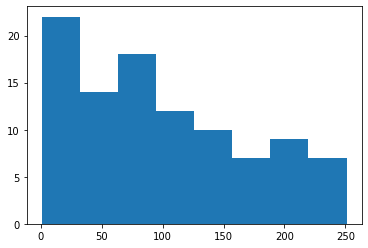

In [60]:
plt.hist(areas, bins='auto')

In [61]:
indices = np.array(indices)

In [62]:
df_small = df_with_labels.iloc[indices, :]

In [63]:
df_small.shape

(99, 3)

In [1]:
# for index, row in df_small.iterrows():
#     image_path, mask_path, label = row
    
#     tif_image = read_tif(image_path)  # uint16
#     tif_mask = read_tif(mask_path)  # uint8
    
#     b, g, r, nir = tif_image
#     mask = tif_mask[0]
    
#     rgb = np.array([r, g, b]).transpose((1, 2, 0))
#     rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#     print('Burned area' if label else 'no burned area')
#     visualize(
#         *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
#         titles=['rgb', 'mask', 'nir'],
#         plot_params=[{}, {}, {'cmap': 'gray'}],
#         figsize=(15, 5)
#     ) 